# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 1 iamlans`

You can check the status of your submissions with the `show submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [2]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
%matplotlib inline

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the 520 words out of 61,000 that had highest mutual information. Therefore, our dataset is a $N \times 520$ dimensional matrix, where $N$ is the number of documents. For very sophisticated technical reasons 1 was added to all the word counts in part A. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

## 1. Exploration of the dataset [40%]

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 ==========
Load the datasets `train_20news_partA.csv` and `train_20news_partB.csv` into two separate pandas DataFrames.

In [3]:
# Your code goes here
data_path_A = os.path.join(os.getcwd(), 'datasets', 'train_20news_partA.csv')
news_A = pd.read_csv(data_path_A, delimiter = ',')
data_path_B = os.path.join(os.getcwd(), 'datasets', 'train_20news_partB.csv')
news_B = pd.read_csv(data_path_B, delimiter = ',')


### ========== Question 1.2 ==========
Display basic information for dataset A such as number of columns, type, and memory usage (*hint: pandas dataframes have a built in method for this*) 

In [4]:
# Your code goes here
news_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


### ========== Question 1.3 ==========
How many data points and how many attributes are there in the dataset that we can use to model the target variable `class`?


*Your answer goes here*

As we can see from the shape of news_A, there are 2129 data points in the training dataset. And by using head() method, we could find that class attribute is not the features of the dataset, thus, besides this attribute, we could have 520 attributes for modeling.

### ========== Question 1.4  ==========
Use a Pandas method to display the summary statistics for the `news_A` DataFrame.

In [5]:
# Your code goes here
news_A.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


### ========== Question 1.5 ==========
Display the first 7 instances of dataset A.

In [6]:
# Your code goes here
news_A.head(7)

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1


### ========== Question 1.6 ==========
Display the names of the first 100 attributes in dataset A. 

You might observe that each attribute consists of two parts:
1. `w<x>_` (where x is an index corresponding to each word)
2. the actual name of the word

In [7]:
# Your code goes here
print(format(news_A.columns[:100]))

Index([u'w1_aaa', u'w2_pins', u'w3_kmr', u'w4_notion', u'w5_queens',
       u'w6_dwyer', u'w7_defenseman', u'w8_gld', u'w9_tocchet', u'w10_home',
       u'w11_buying', u'w12_internet', u'w13_slots', u'w14_compatible',
       u'w15_transfer', u'w16_baltimore', u'w17_mean', u'w18_person',
       u'w19_performance', u'w20_support', u'w21_tor', u'w22_gm', u'w23_mouse',
       u'w24_base', u'w25_population', u'w26_bob', u'w27_set', u'w28_it',
       u'w29_earth', u'w30_faith', u'w31_steve', u'w32_caps', u'w33_printer',
       u'w34_east', u'w35_cable', u'w36_adapter', u'w37_mss', u'w38_catcher',
       u'w39_bullpen', u'w40_obp', u'w41_innocent', u'w42_european',
       u'w43_angeles', u'w44_settings', u'w45_words', u'w46_rit', u'w47_shots',
       u'w48_ports', u'w49_vga', u'w50_coverage', u'w51_jumpers', u'w52_bases',
       u'w53_sea', u'w54_pts', u'w55_behavior', u'w56_domi', u'w57_sabres',
       u'w58_yzerman', u'w59_messier', u'w60_goalies', u'w61_hawks',
       u'w62_our', u'w63_sx'

### ========== Question 1.7 ==========
Familiarise yourself with the [`stripplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.stripplot.html) function in `seaborn`. Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset A. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise.

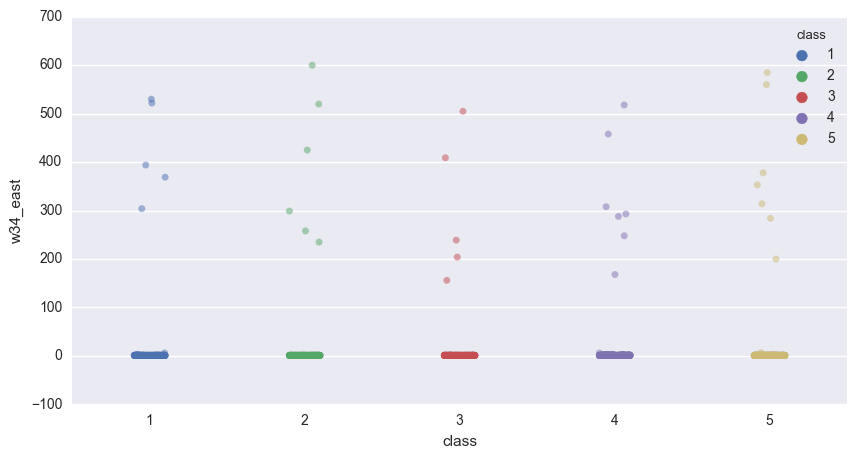

In [8]:
# Your code goes here

fig,ax = plt.subplots(figsize=(10,5))
sns.stripplot(x='class',y='w34_east',hue='class',jitter=True,alpha=.50,data = news_A)
plt.show()

### ========== Question 1.8 ==========
The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of noise into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. 

For this, you will be using the function `scatter_jitter` provided below. This function takes as input two numpy arrays containing the features of interest. Pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2.

In [9]:
def scatter_jitter(arr1, arr2, jitter=0.2):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)

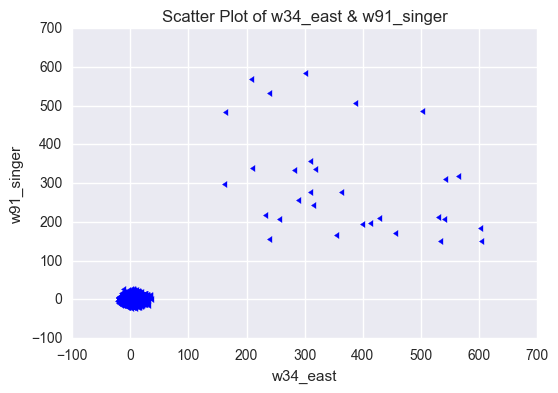

In [10]:
# Your code goes here
scatter_jitter(news_A.w34_east,news_A.w91_singer)
plt.title('Scatter Plot of w34_east & w91_singer')
plt.xlabel('w34_east')
plt.ylabel('w91_singer')
plt.show()

### ========== Question 1.9 ==========
From the strip and scatter plots above you might observe that there is something peculiar about the data. Indeed most attributes take very small values (usually in the range 1-10) but there are some data points (i.e. rows) in the dataset where the attributes take very large values. These data points are called [outliers](https://en.wikipedia.org/wiki/Outlier).

You might think that the presence of outliers in the dataset has been a resut of noise contamination (you wouldn't expect the same word to appear 600 times within an e-mail, would you?). Your job now is to create a new dataset from dataset A (name it `news_A_clean`) and remove the outliers. Create some metric to find the outliers and check that your metric is reasonable. Be careful not to alter the original `news_A`...we may require it in its dirty format later...

In [11]:
# Your code goes here
news_A_clean = news_A.copy(True)
news_A_clean = news_A_clean[news_A_clean<100]
news_A_clean.dropna(axis=0,inplace=True)

### ========== Question 1.10 ==========
Write code to return the number of data points in the clean dataset, and the number of documents that have been excluded as outliers

In [12]:
# Your code goes here
print('the number of data points in the clean dataset is:',news_A_clean.shape[0])
print('the number of documents that have been excluded as outliers is:',news_A.shape[0]-news_A_clean.shape[0])

the number of data points in the clean dataset is: 2091
the number of documents that have been excluded as outliers is: 38


## 2. Naive Bayes classification [60%]
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset A. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 ==========

By using the `scatter_jitter` function provided above, display a scatter plot of the features `w281_ico` and `w273_tek` for the cleaned dataset A. Set the jitter value to something small (e.g. 0.1). Label axes appropriately.

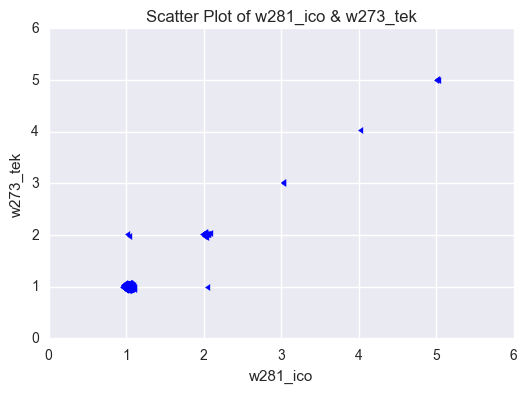

In [13]:
# Your code goes here
scatter_jitter(news_A_clean.w281_ico,news_A_clean.w273_tek,0.1)
plt.title('Scatter Plot of w281_ico & w273_tek')
plt.xlabel('w281_ico')
plt.ylabel('w273_tek')
plt.show()

### ========== Question 2.2 ==========
What do you observe? 

How does that relate to the Naive Bayes assumption? 

What would be the main issue we would have to face if we didn't make this assumption?

*Your answer goes here:*

From the plot, we could observe that some relevance exists between two features because with the increase of the number of w281_ico, the number of w273_tek increases. It's like a linear relation (f(x)=x).

The Naive Bayes assumption is that we assume the features are conditional indenpent, which means the appearance of one feature will not influence the appearance of other features and this assumption makes the Bayes naive. So, if the relationship between w273_tek and w281_ico exists, we cannot use the bayes rule while calculating the possibility. 

### ========== Question 2.3 ==========
Fit a Gaussian Naive Bayes model to the cleaned dataset A. Your input features should be all the attributes in the dataset except the `class` attribute which will be your target. Display the classification accuracy on the training dataset.

In [14]:
# Your code goes here
from sklearn.naive_bayes import GaussianNB

X=news_A_clean.drop('class',axis=1)
y=news_A_clean['class']

clf = GaussianNB()
clf.fit(X, y)
print('The classification accuracy on the training dataset is:',format(clf.score(X,y)))

The classification accuracy on the training dataset is: 0.889048302248


### ========== Question 2.4 ==========
Plot the (normalised) confusion matrix for the training data. Label axes appropriately.

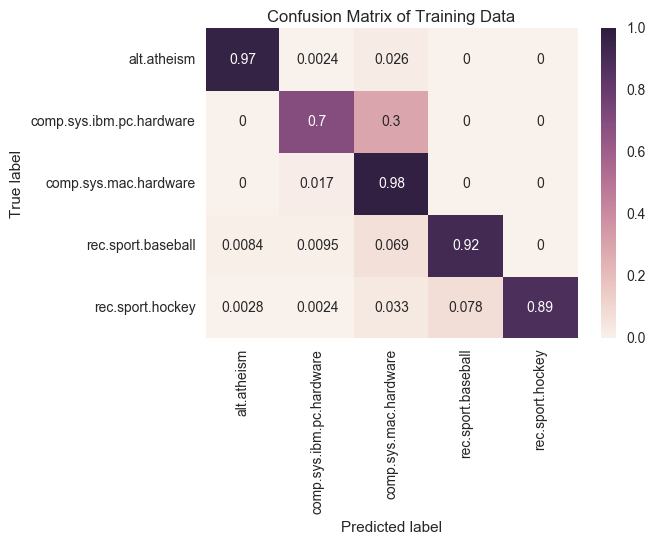

In [15]:
# Your code goes here
from sklearn.metrics import accuracy_score, confusion_matrix

result_cm=confusion_matrix(y,clf.predict(X))
#print(result_cm)

row_sum = result_cm.sum(axis=1)
nor_result = result_cm / row_sum.T
#print(nor_result)

ticklabel = ['alt.atheism','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','rec.sport.baseball','rec.sport.hockey']
sns.heatmap(nor_result, xticklabels=ticklabel, yticklabels=ticklabel, vmin=0., vmax=1., annot=True)
plt.title('Confusion Matrix of Training Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### ========== Question 2.5  ==========

Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

*Your answer goes here*

The performance of the classifier is essentially the same as what I expected. The classifier gets excellent results(>0.9) on perdicting atheism, ibm.pc.hardware, baseball and hockey. As for the mac.hardware, the classifier only has the accuracy about 0.7. I think this is because this class always has same content with ibm.pc.hardware. So, we could see the wrong results of mac.hardware is mostly about mac.hardware.

### ========== Question 2.6 ==========
Fit a Gaussian Naive Bayes model to the original dataset A (including the outliers). Display the classification accuracy on the training dataset.

In [16]:
# Your code goes here
X_2 = news_A.drop('class',axis=1)
y_2 = news_A['class']

clf2 = GaussianNB()
clf2.fit(X_2,y_2)

print('The classification accuracy on the original training dataset is:',format(clf2.score(X_2,y_2)))

The classification accuracy on the original training dataset is: 0.205260685768


### ========== Question 2.7 ==========
Comment on the above results (Questions 2.3 & 2.6). In particular explain why you think that cleaning the data helps in this case.

*Your answer goes here*

Since the data cleaning process makes the dataset more consistent, the prediction results get huge improvement(from 0.2052 to o.8890). More details, the outlier will expand the boundary of one class and the intersection between classes become larger, which will finally result in a low accuracy. Thus, removing outlier helps to improve the performance.

### ========== Question 2.8 ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). Use the classifier you trained in Question 2.5 (i.e. on the cleaned dataset) and test its performance on dataset `train_20news_partB`. 

Display the (normalized) confusion matrix and the classification accuracy on the Dataset B.

In [18]:
# Your code goes here
#news_B.info()
test = news_B.drop('class',axis=1)
test_cls = news_B['class']

test_result = confusion_matrix(test_cls,clf.predict(test))

sum_B = test_result.sum(axis=1)
nor_test_result = test_result / sum_B.T

print('Normalized confusion matrix: \n',format(nor_test_result))
print('The classification accuracy on the dataset B: ',format(clf.score(test,test_cls)))

Normalized confusion matrix: 
 [[ 0.95        0.          0.          0.03846154  0.        ]
 [ 0.          0.65625     0.5         0.          0.        ]
 [ 0.          0.09375     0.86363636  0.          0.        ]
 [ 0.          0.          0.13636364  0.88461538  0.        ]
 [ 0.          0.03125     0.          0.07692308  0.89285714]]
The classification accuracy on the dataset B:  0.8359375


### ========== Question 2.9 ==========

Comment on the results from the previous question. Do you think this is an acceptable level of performance? Which are the easiest and most difficult classes to predict correctly? 

*Your answer goes here*

I think the performance is acceptable. Besides the comp.sys.mac.hardware, the classifier gets good results in predicting other 4 classes. From the confusion matrix, we could see alt.atheism and rec.sport.hockey are the easiest classes to predict since they are all correctly predicted. By constract, comp.sys.mac.hardware is the most difficult class to predict. I think the reason of that is because it has very similar content with comp.sys.ibm.pc.hardware.


### ========== Question 2.10 ==========
What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of and what would its performance be on this dataset?* 

*Your answer goes here*

The simplest classifier I could think of is a random classifier, which means the classifier perdicts the result with random numbers. If the random numbers are random enough, the accuracy will finally be about 0.2. The reason I think this could be the baseline is that this classifier could be achieved easily and the result of this classifier repersents the basic performance in real world (knowing nothing and just guessing). 


### ========== Question 2.11 ==========

Estimate the baseline performance.

We get the random results from random numbers: [3 2 1 ..., 5 1 3]
The accuracy of random classifier: 0.20468675275


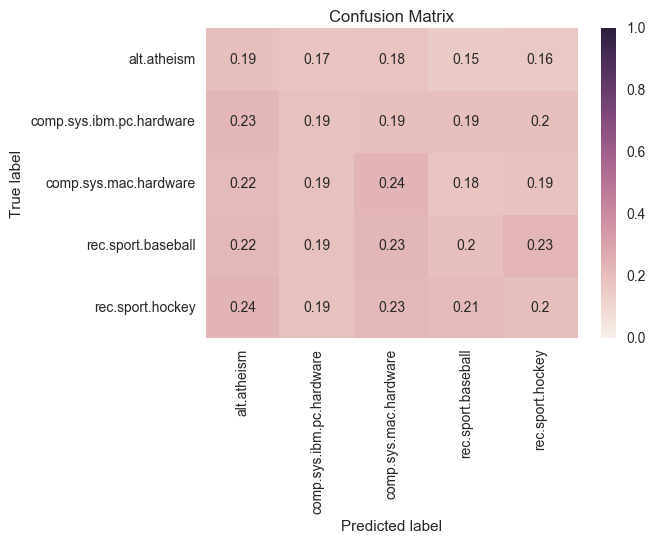

In [20]:
# Your code goes here
from sklearn.metrics import accuracy_score, confusion_matrix

est_array = np.random.randint(1,6,size=2091)
print('We get the random results from random numbers:',format(est_array))

#get the confusion matrix
est_cm = confusion_matrix(y,est_array)

#get the number of correct prediction
diag = np.diag_indices(5)
est_sum = sum(est_cm[diag])

#the accuracy of random classifier
print('The accuracy of random classifier:',format(est_sum/2091))

#noemalised the confusion matrix
sum_est = est_cm.sum(axis=1)
nor_est = est_cm / sum_est.T

#plot the performance
ticklabel = ['alt.atheism','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','rec.sport.baseball','rec.sport.hockey']
sns.heatmap(nor_est, xticklabels=ticklabel, yticklabels=ticklabel, vmin=0., vmax=1., annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#The baseline performance is just as what I expected(around 0.20)

### ========== Question 2.12 ==========

Execute the cell below to get the prediction on the test dataset by using a different classifier which we will be introducing in this class later on. By using this prediction provided below (`rf_prediction`) plot the confusion matrix and display the classification accuracy on the test dataset. *Important: Make sure the test dataset is loaded in a DataFrame called `news_B` otherwise execution will return an error. In that case replace the DataFrame name in the third line.*

Classification accuracy on the test set by using a Random Forest: 0.8671875


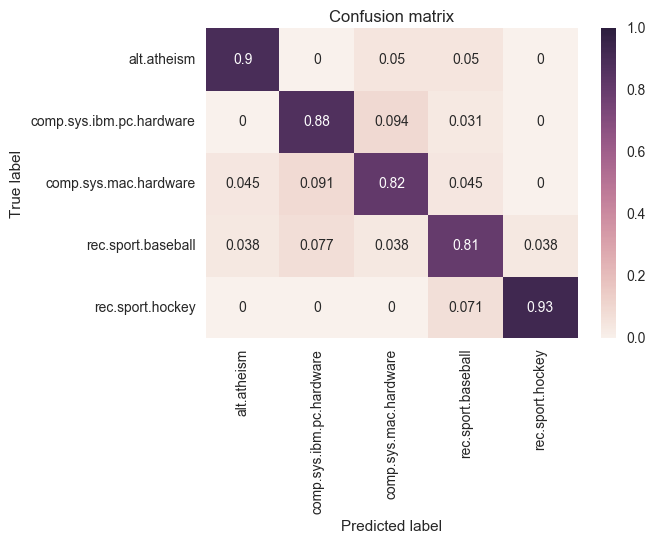

In [21]:
from sklearn.ensemble import RandomForestClassifier
ticklabel = ['alt.atheism','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','rec.sport.baseball','rec.sport.hockey']

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

X_tr=news_A_clean.drop('class',axis=1)
y_tr=news_A_clean['class']

rf = RandomForestClassifier(n_estimators = 50).fit(X=X_tr, y=y_tr)
X_ts = news_B.drop('class', axis=1)
y_ts = news_B['class']
rf_prediction = rf.predict(X=X_ts)
# Your code goes here
print('Classification accuracy on the test set by using a Random Forest:', accuracy_score(y_ts, rf.predict(X=X_ts)))
plt.figure()
cm = confusion_matrix(y_ts, rf_prediction)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=ticklabel)

### ========== Question 2.13 ==========

Which classifier (Naive Bayes or Random Forest) would you trust if you had to choose? What are the reasons you believe the Gaussian Naive Bayes classifier does not perofm so well in this particular problem? You are not expected to justify the performance level achieved by the Random Forest classifier.

*Your answer goes here.*

I will choose Random Forest classifier since it has higher accuracy compared with Naive Bayes classifier. I think the reason why Naive Bayes does not perform well is that the basic assumption ignores the relationship between different attributes, which influence the accuracy. Also, another reason I could think of is that Gaussian is contineous distribution and is not suitable in this case for the reason that the data is discret.